In [7]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "air-quality-seoul"

# **Import**

In [8]:
library(dplyr)
library(psych)
library(zoo)
library(lubridate)
library(gridExtra)
library(ggplot2)
library(ggcorrplot)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# **1. Data Import & Structure**

In [9]:
data <- read.csv('/kaggle/input/air-quality-seoul/Air_Quality_Seoul_2017-2020.csv')

* **Measurement date : Date and hour of measurement**
* **Station code : Station which the data was collected**
* **SO2 : SO2, Sulfur dioxide**
* **NO2 : NO2, Nitrogen dioxide**
* **O3 : O3, Ozone**
* **CO : CO, Carbon monoxide**
* **PM10 : PM10, particulate matter**
* **PM2.5 : PM2.5, particulate matter**

In [10]:
str(data)

'data.frame':	866459 obs. of  8 variables:
 $ Measurement.date: chr  "2017-01-01 00:00:00" "2017-01-01 01:00:00" "2017-01-01 02:00:00" "2017-01-01 03:00:00" ...
 $ Station.code    : int  101 101 101 101 101 101 101 101 101 101 ...
 $ SO2             : num  0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.004 0.003 ...
 $ NO2             : num  0.059 0.058 0.056 0.056 0.051 0.046 0.049 0.045 0.047 0.047 ...
 $ O3              : num  0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 ...
 $ CO              : num  1.2 1.2 1.2 1.2 1.2 1.1 1.1 1 1.1 1.1 ...
 $ PM10            : num  73 71 70 70 69 70 66 71 72 74 ...
 $ PM2.5           : num  57 59 59 58 61 61 57 60 60 63 ...


In [11]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Measurement.date*,1,866459,1.733166e+04,1.000722e+04,17330.000,1.733145e+04,1.284969e+04,1.000,34664.000,34663.000,2.233985e-04,-1.200147,1.075076e+01
Station.code,2,866459,1.130002e+02,7.211250e+00,113.000,1.130002e+02,8.895600e+00,101.000,125.000,24.000,-4.063747e-05,-1.203864,7.747054e-03
SO2,3,866459,4.109270e-03,7.103453e-03,0.004,3.832040e-03,1.482600e-03,0.001,3.736,3.735,3.082815e+02,137471.238638,7.631247e-06
NO2,4,866459,2.771614e-02,8.026966e-02,0.024,2.569983e-02,1.482600e-02,0.001,38.445,38.444,3.451731e+02,146499.915297,8.623378e-05
O3,5,866459,2.468951e-02,5.062161e-02,0.022,2.240945e-02,1.779120e-02,0.001,33.600,33.599,4.712563e+02,280435.080667,5.438285e-05
CO,6,866459,5.128733e-01,4.196153e-01,0.500,4.765610e-01,1.482600e-01,0.100,71.700,71.600,4.383697e+01,4111.239164,4.507932e-04
PM10,7,866459,4.237672e+01,6.654934e+01,34.000,3.648027e+01,2.075640e+01,1.000,3586.000,3585.000,2.551938e+01,935.574525,7.149402e-02
PM2.5,8,866459,2.482998e+01,4.297000e+01,19.000,2.066617e+01,1.334340e+01,1.000,6256.000,6255.000,2.277189e+01,1084.016228,4.616271e-02


In [12]:
summary(data)

 Measurement.date    Station.code      SO2                NO2          
 Length:866459      Min.   :101   Min.   :0.001000   Min.   : 0.00100  
 Class :character   1st Qu.:107   1st Qu.:0.003000   1st Qu.: 0.01500  
 Mode  :character   Median :113   Median :0.004000   Median : 0.02400  
                    Mean   :113   Mean   :0.004109   Mean   : 0.02772  
                    3rd Qu.:119   3rd Qu.:0.005000   3rd Qu.: 0.03700  
                    Max.   :125   Max.   :3.736000   Max.   :38.44500  
       O3                 CO               PM10             PM2.5        
 Min.   : 0.00100   Min.   : 0.1000   Min.   :   1.00   Min.   :   1.00  
 1st Qu.: 0.01000   1st Qu.: 0.3000   1st Qu.:  22.00   1st Qu.:  11.00  
 Median : 0.02200   Median : 0.5000   Median :  34.00   Median :  19.00  
 Mean   : 0.02469   Mean   : 0.5129   Mean   :  42.38   Mean   :  24.83  
 3rd Qu.: 0.03400   3rd Qu.: 0.6000   3rd Qu.:  51.00   3rd Qu.:  30.00  
 Max.   :33.60000   Max.   :71.7000   Max.   :3586.0

**Missing Value Check**

In [13]:
colSums(is.na(data))

Measurement.date     Station.code              SO2              NO2 
               0                0                0                0 
              O3               CO             PM10            PM2.5 
               0                0                0                0

**Duplicate check**

In [14]:
sum(duplicated(data))

[1] 0

-------

# **2. Data Transform**

In [15]:
names(data) <- c('Date','StationCode','SO2','NO2','O3','CO','PM10','PM2.5')

In [16]:
data$Date <- as.Date(data$Date)

**Data Check**

In [17]:
head(data)

,Date,StationCode,SO2,NO2,O3,CO,PM10,PM2.5
,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017-01-01,101,0.004,0.059,0.002,1.2,73,57
2,2017-01-01,101,0.004,0.058,0.002,1.2,71,59
3,2017-01-01,101,0.004,0.056,0.002,1.2,70,59
4,2017-01-01,101,0.004,0.056,0.002,1.2,70,58
5,2017-01-01,101,0.003,0.051,0.002,1.2,69,61
6,2017-01-01,101,0.003,0.046,0.002,1.1,70,61


---------

# **3. Data Visualization**

In [18]:
# Data for visualization 
data2 <- data 

**Year-to-year change**

In [19]:
p1 <- ggplot(data2)+ geom_line(mapping= aes(x=Date, y= SO2))  +
                        ggtitle('Change in \'SO2\' by year') + theme_bw()

p2 <- ggplot(data2)+ geom_line(mapping= aes(x=Date, y= NO2))  +
                        ggtitle('Change in \'NO2\' by year') + theme_bw()

p3 <- ggplot(data2)+ geom_line(mapping= aes(x=Date, y= O3))  +
                        ggtitle('Change in \'O3\' by year') + theme_bw()

p4 <- ggplot(data2)+ geom_line(mapping= aes(x=Date, y= CO))  +
                        ggtitle('Change in \'CO\' by year') + theme_bw()

p5 <- ggplot(data2)+ geom_line(mapping= aes(x=Date, y= PM10))  +
                        ggtitle('Change in \'PM10\' by year') + theme_bw()

p6 <- ggplot(data2)+ geom_line(mapping= aes(x=Date, y= PM2.5))  +
                        ggtitle('Change in \'PM2.5\' by year') + theme_bw() 

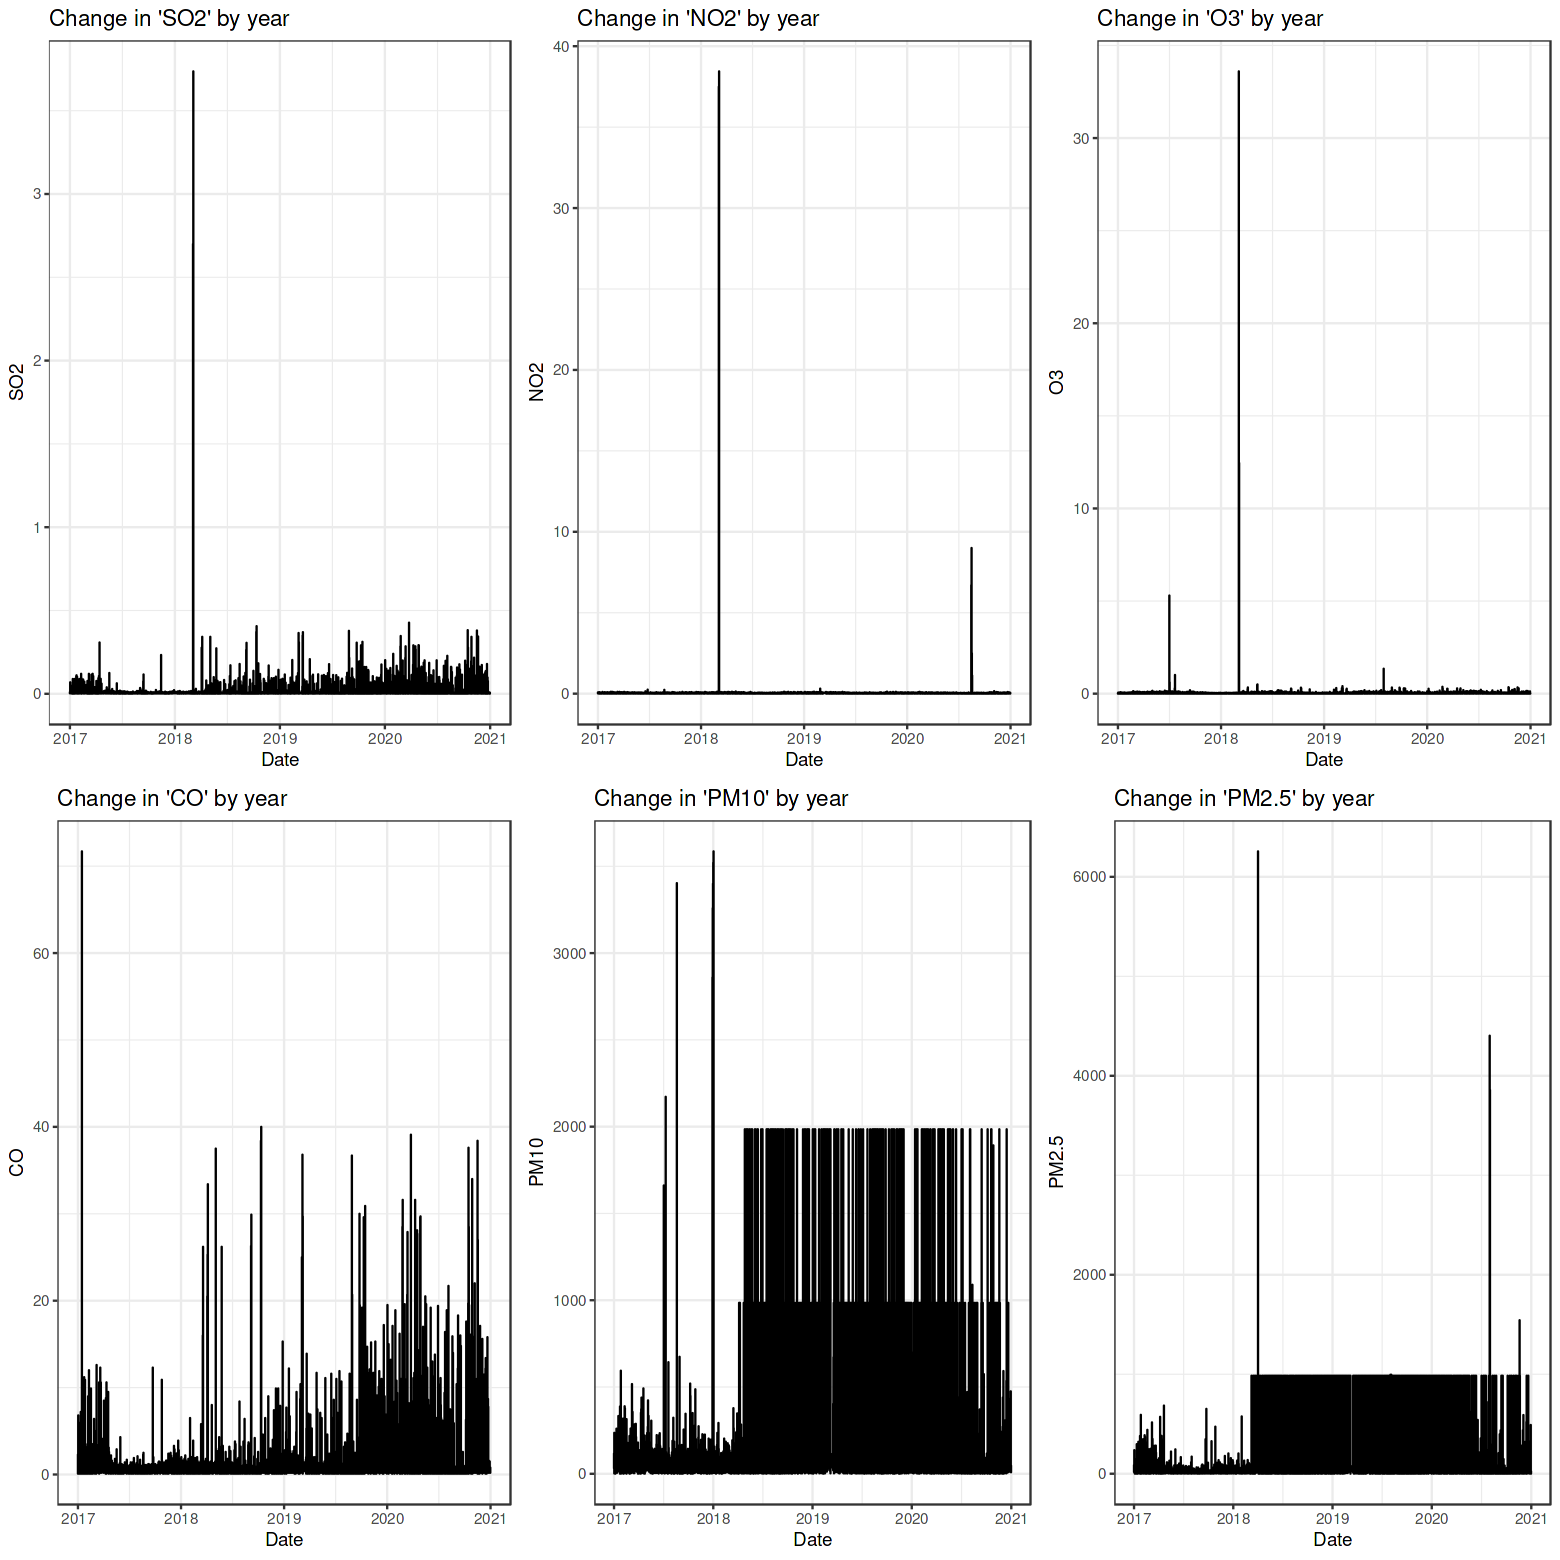

In [20]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

-------------

**Check the moving average(90 Days) of SO2**

In [21]:
temp <- zoo(data2$SO2, data2$Date)

Warning message in zoo(data2$SO2, data2$Date):
“some methods for “zoo” objects do not work if the index entries in ‘order.by’ are not unique”


In [22]:
temp_rollmean <- rollmean(temp, 3, fill = list(NA, NULL, NA))

Warning message in zoo(rval[i], index(x)[i]):
“some methods for “zoo” objects do not work if the index entries in ‘order.by’ are not unique”


In [23]:
data2$mean_SO2 <- coredata(temp_rollmean)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


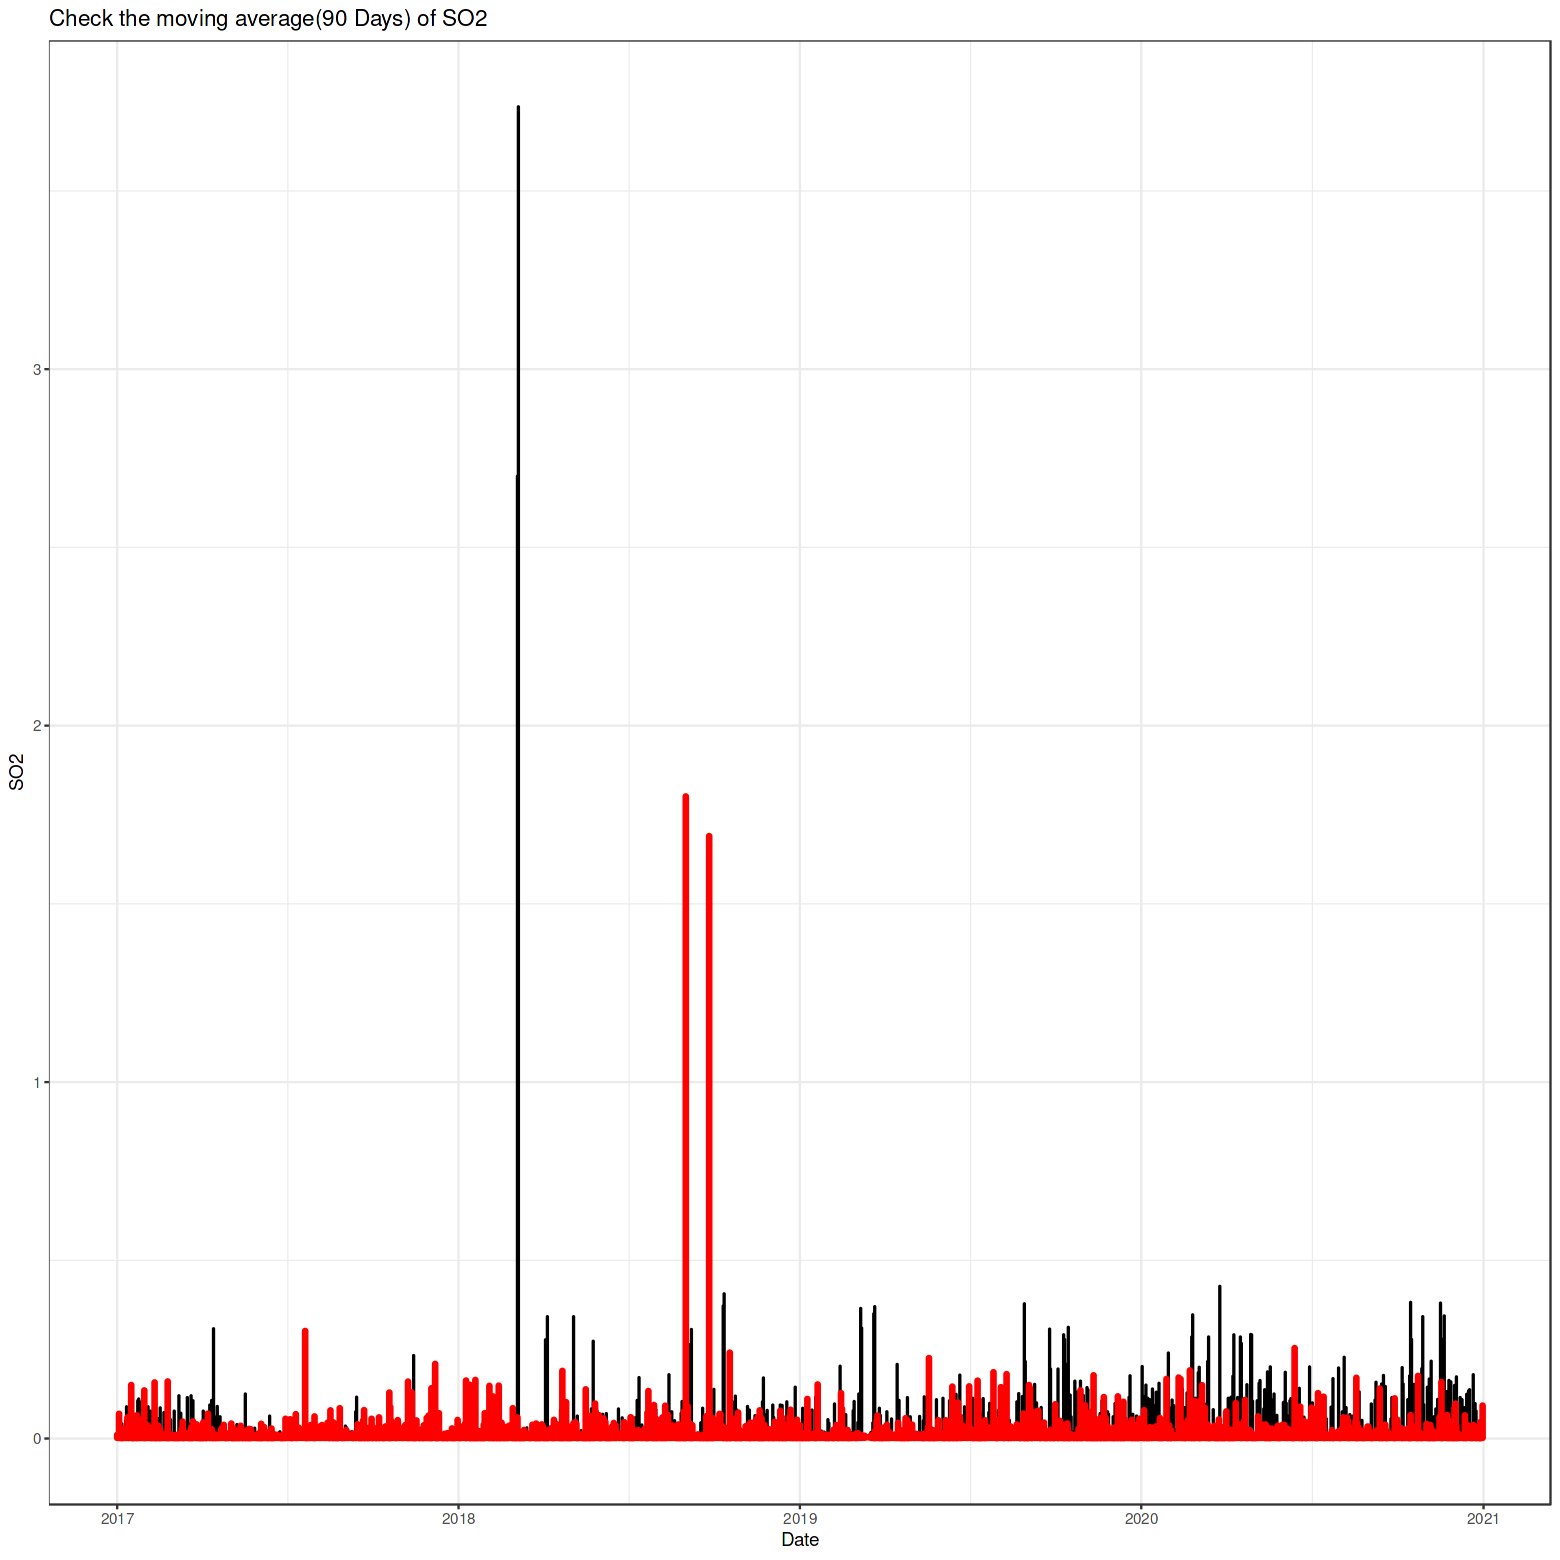

In [24]:
ggplot(data2, aes(x = Date, y = SO2)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean_SO2), color = 'red', size = 1.4) +
        theme_bw() +
        ggtitle('Check the moving average(90 Days) of SO2')

--------------

**Check the moving average(90 Days) of CO**

In [25]:
temp <- zoo(data2$CO, data2$Date)

Warning message in zoo(data2$CO, data2$Date):
“some methods for “zoo” objects do not work if the index entries in ‘order.by’ are not unique”


In [26]:
temp_rollmean <- rollmean(temp, 3, fill = list(NA, NULL, NA))

Warning message in zoo(rval[i], index(x)[i]):
“some methods for “zoo” objects do not work if the index entries in ‘order.by’ are not unique”


In [27]:
data2$mean_CO <- coredata(temp_rollmean)

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


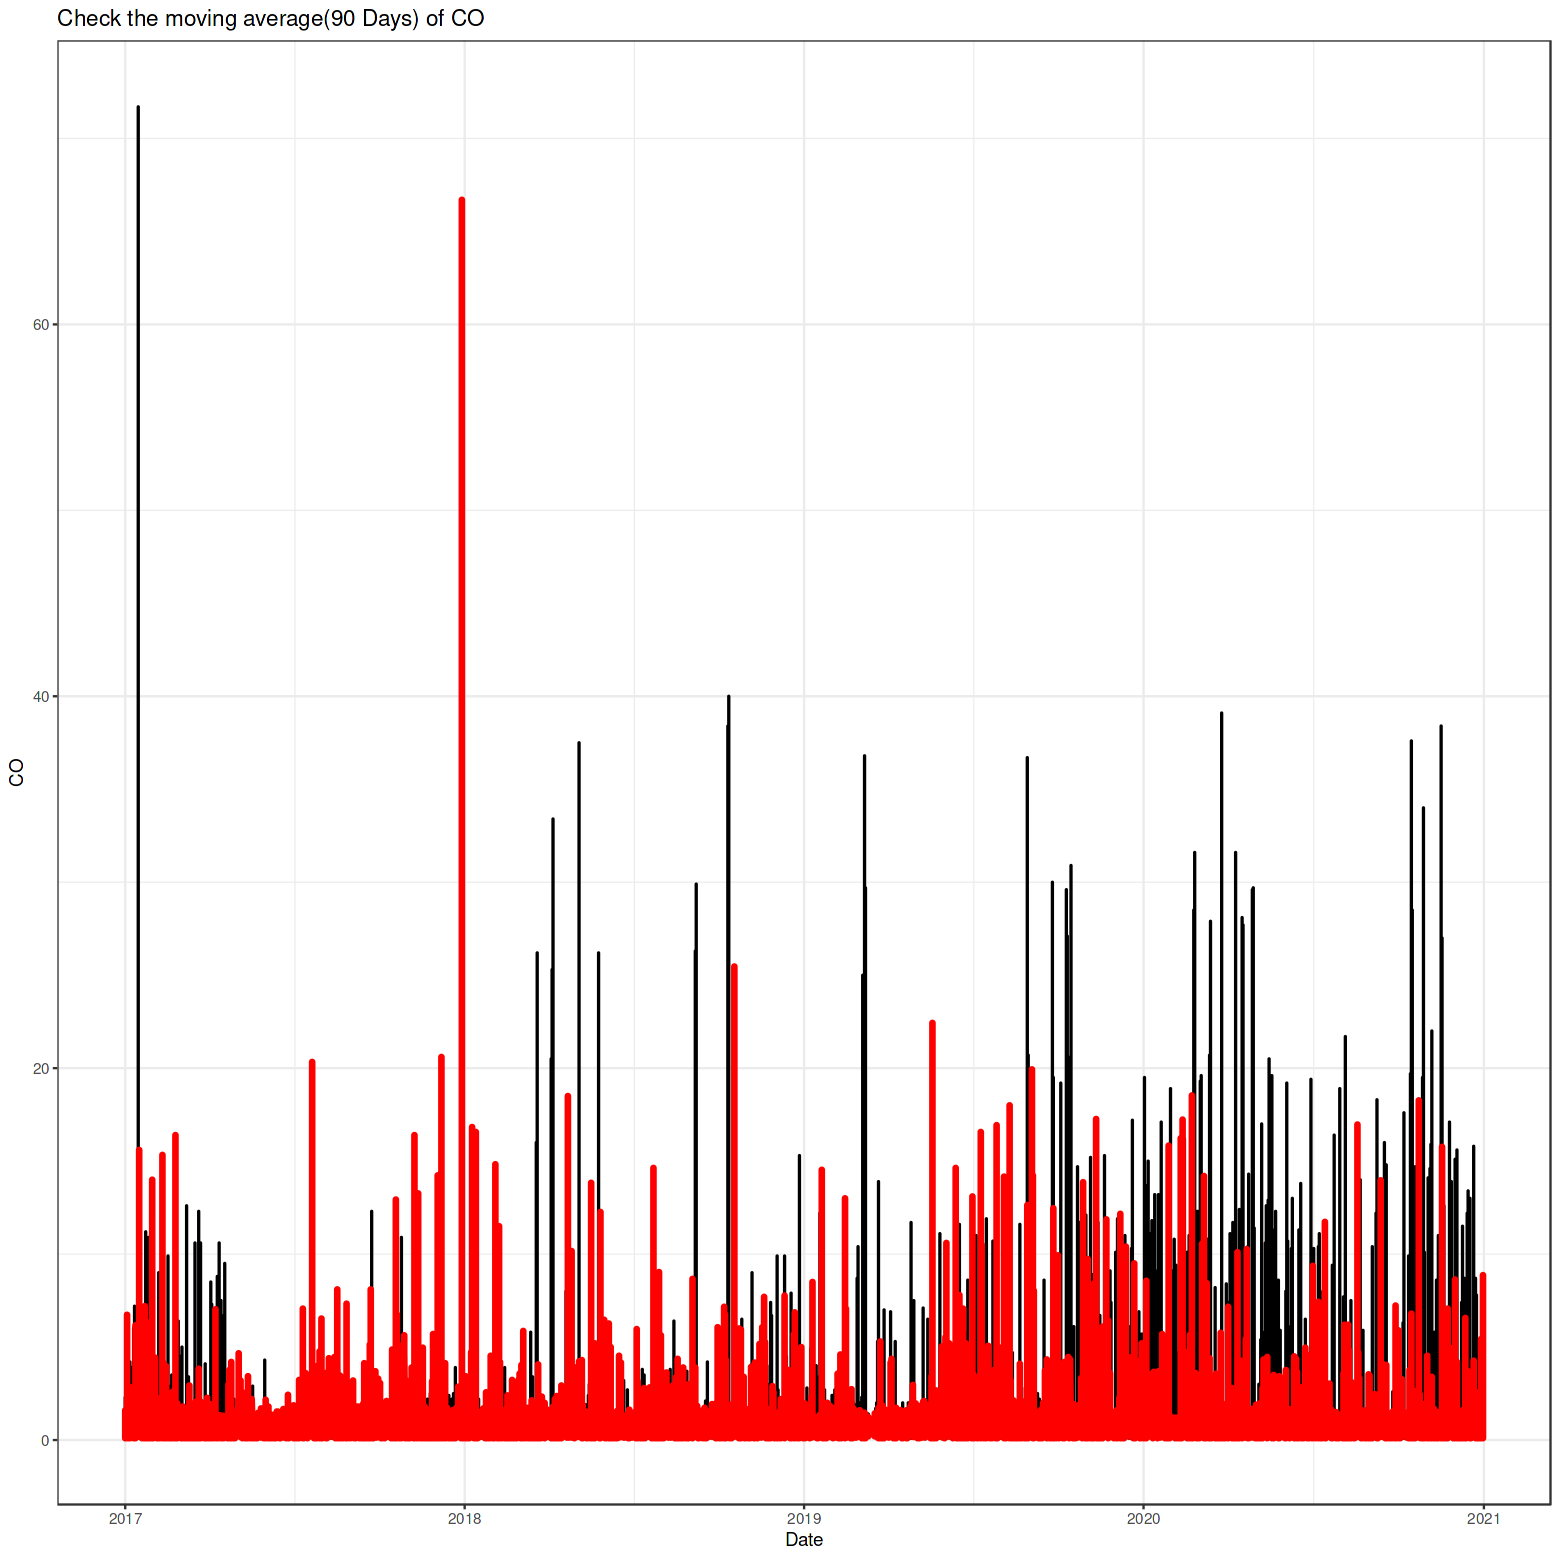

In [28]:
ggplot(data2, aes(x = Date, y = CO)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean_CO), color = 'red', size = 1.4) +
        theme_bw() +
        ggtitle('Check the moving average(90 Days) of CO')

----------

**Check the moving average(90 Days) of O3**

In [29]:
temp <- zoo(data2$O3,data2$Date)

Warning message in zoo(data2$O3, data2$Date):
“some methods for “zoo” objects do not work if the index entries in ‘order.by’ are not unique”


In [30]:
temp_rollmean <- rollmean(temp, 3, fill = list(NA, NULL, NA))

Warning message in zoo(rval[i], index(x)[i]):
“some methods for “zoo” objects do not work if the index entries in ‘order.by’ are not unique”


In [31]:
data2$mean_O3 <- coredata(temp_rollmean)

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


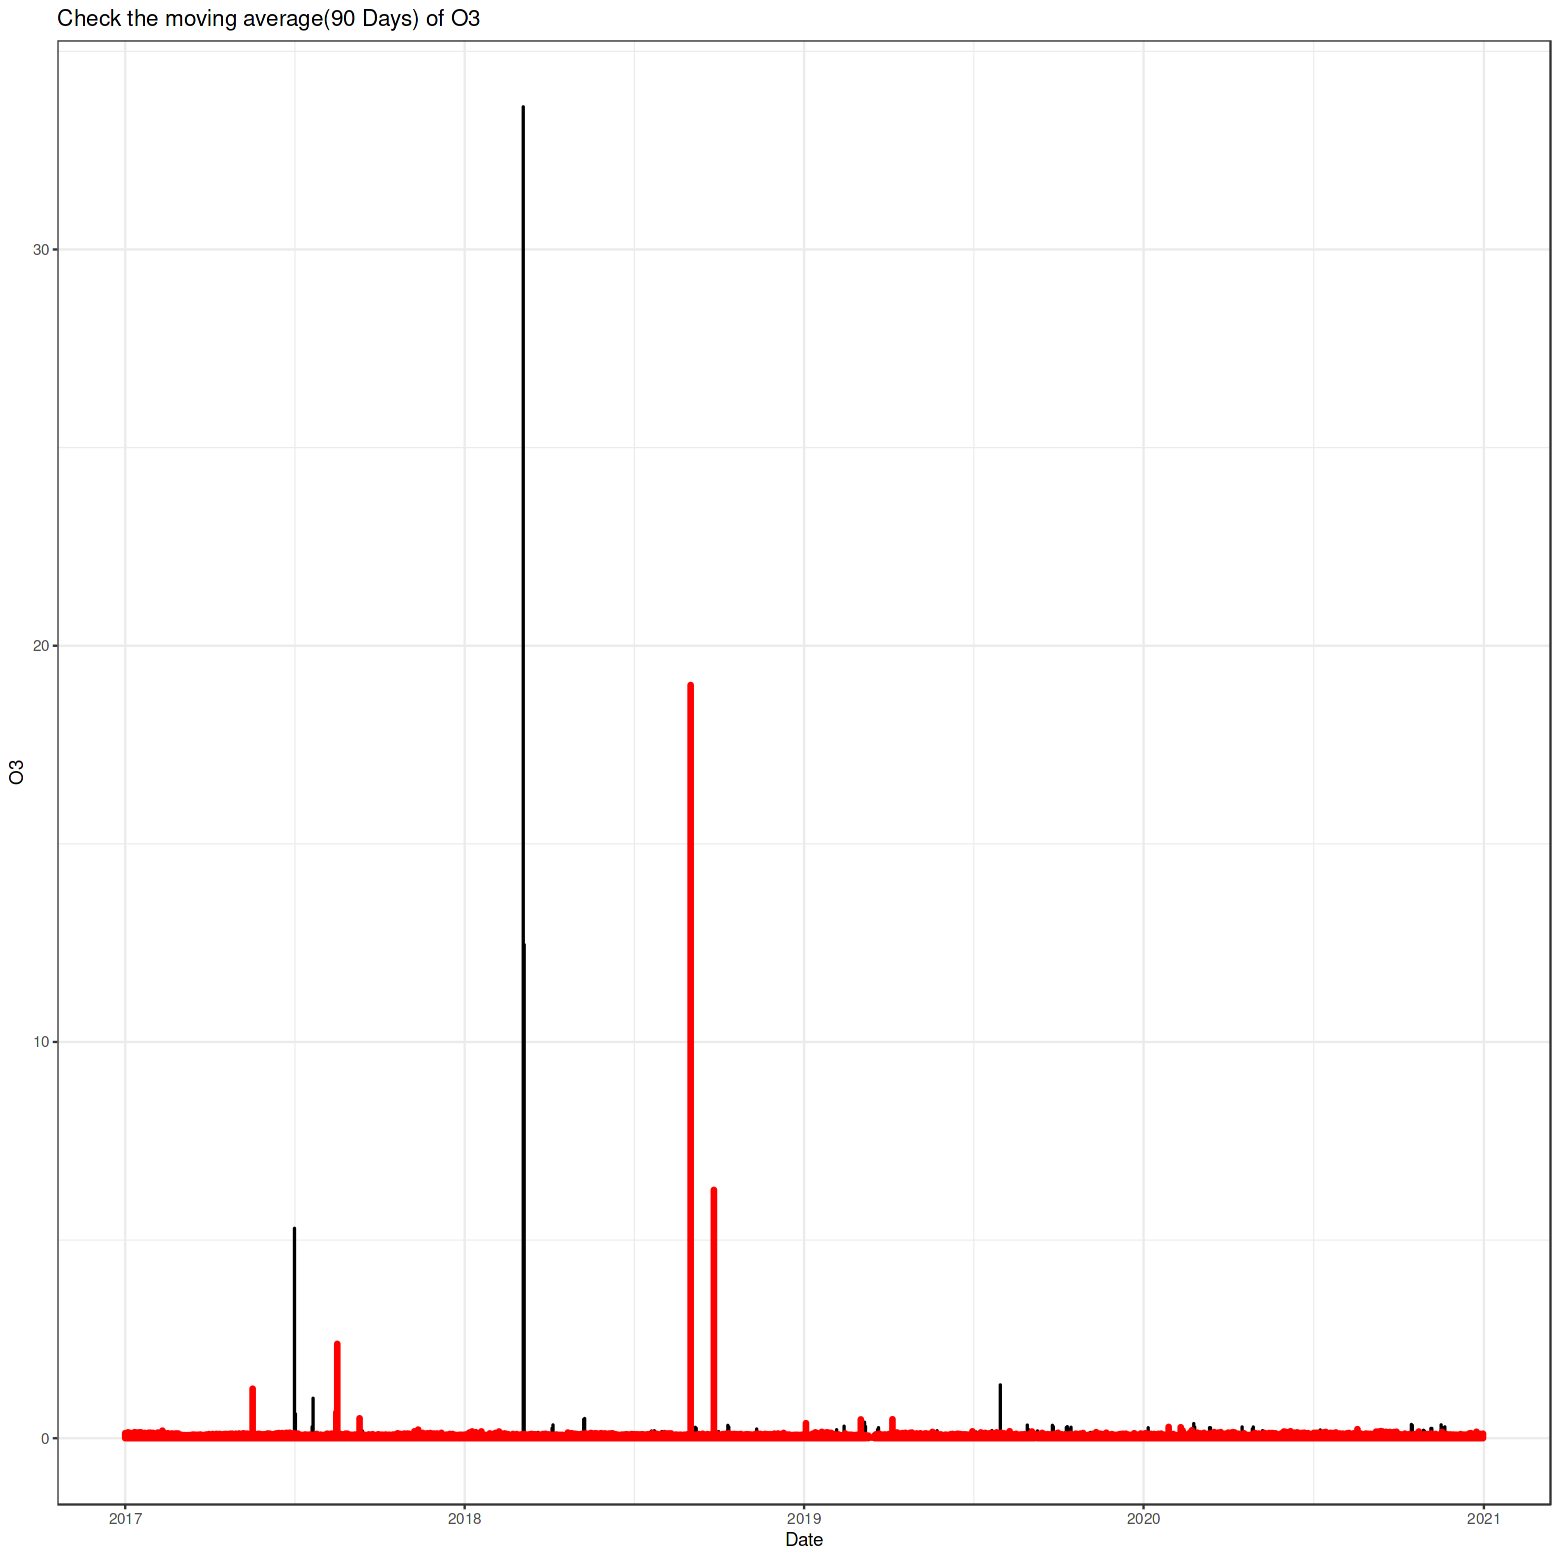

In [32]:
ggplot(data2, aes(x = Date, y = O3)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean_O3), color = 'red', size = 1.4) +
        theme_bw() +
        ggtitle('Check the moving average(90 Days) of O3')

-----------

**Average change in variables by year**

In [33]:
data2 <- data

In [34]:
data2$Year <- year(data2$Date)

In [35]:
year_avg_so <- data2 %>% group_by(Year) %>% summarize(avg_so = mean(SO2,na.rm=T))
year_avg_no <- data2 %>% group_by(Year) %>% summarize(avg_no = mean(NO2,na.rm=T))
year_avg_co <- data2 %>% group_by(Year) %>% summarize(avg_co = mean(CO,na.rm=T))
year_avg_o3 <- data2 %>% group_by(Year) %>% summarize(avg_o3 = mean(O3,na.rm=T))
year_avg_pm10 <- data2 %>% group_by(Year) %>% summarize(avg_pm10 = mean(PM10,na.rm=T))
year_avg_pm2.5 <- data2 %>% group_by(Year) %>% summarize(avg_pm2.5 = mean(PM2.5,na.rm=T))

In [36]:
p1 <- ggplot(year_avg_so, aes(x= Year, y= avg_so)) + geom_line() + geom_point(color= 'red',size= 3)+ 
            ggtitle('Average SO2 change by year') + theme_bw() + 
            ylab('Average SO2')

p2 <- ggplot(year_avg_no, aes(x= Year, y= avg_no)) + geom_line() + geom_point(color= 'red',size= 3)+ 
            ggtitle('Average NO2 change by year') + theme_bw() + 
            ylab('Average NO2')

p3 <- ggplot(year_avg_co, aes(x= Year, y= avg_co)) + geom_line() + geom_point(color= 'red',size= 3)+ 
            ggtitle('Average CO change by year') + theme_bw() + 
            ylab('Average CO')

p4 <- ggplot(year_avg_o3, aes(x= Year, y= avg_o3)) + geom_line() + geom_point(color= 'red',size= 3)+ 
            ggtitle('Average O3 change by year') + theme_bw() + 
            ylab('Average O3')

p5 <- ggplot(year_avg_pm10, aes(x= Year, y= avg_pm10)) + geom_line() + geom_point(color= 'red',size= 3)+ 
            ggtitle('Average PM10 change by year') + theme_bw() + 
            ylab('Average PM10')

p6 <- ggplot(year_avg_pm2.5, aes(x= Year, y= avg_pm2.5)) + geom_line() + geom_point(color= 'red',size= 3)+ 
            ggtitle('Average PM2.5 change by year') + theme_bw() + 
            ylab('Average PM2.5')


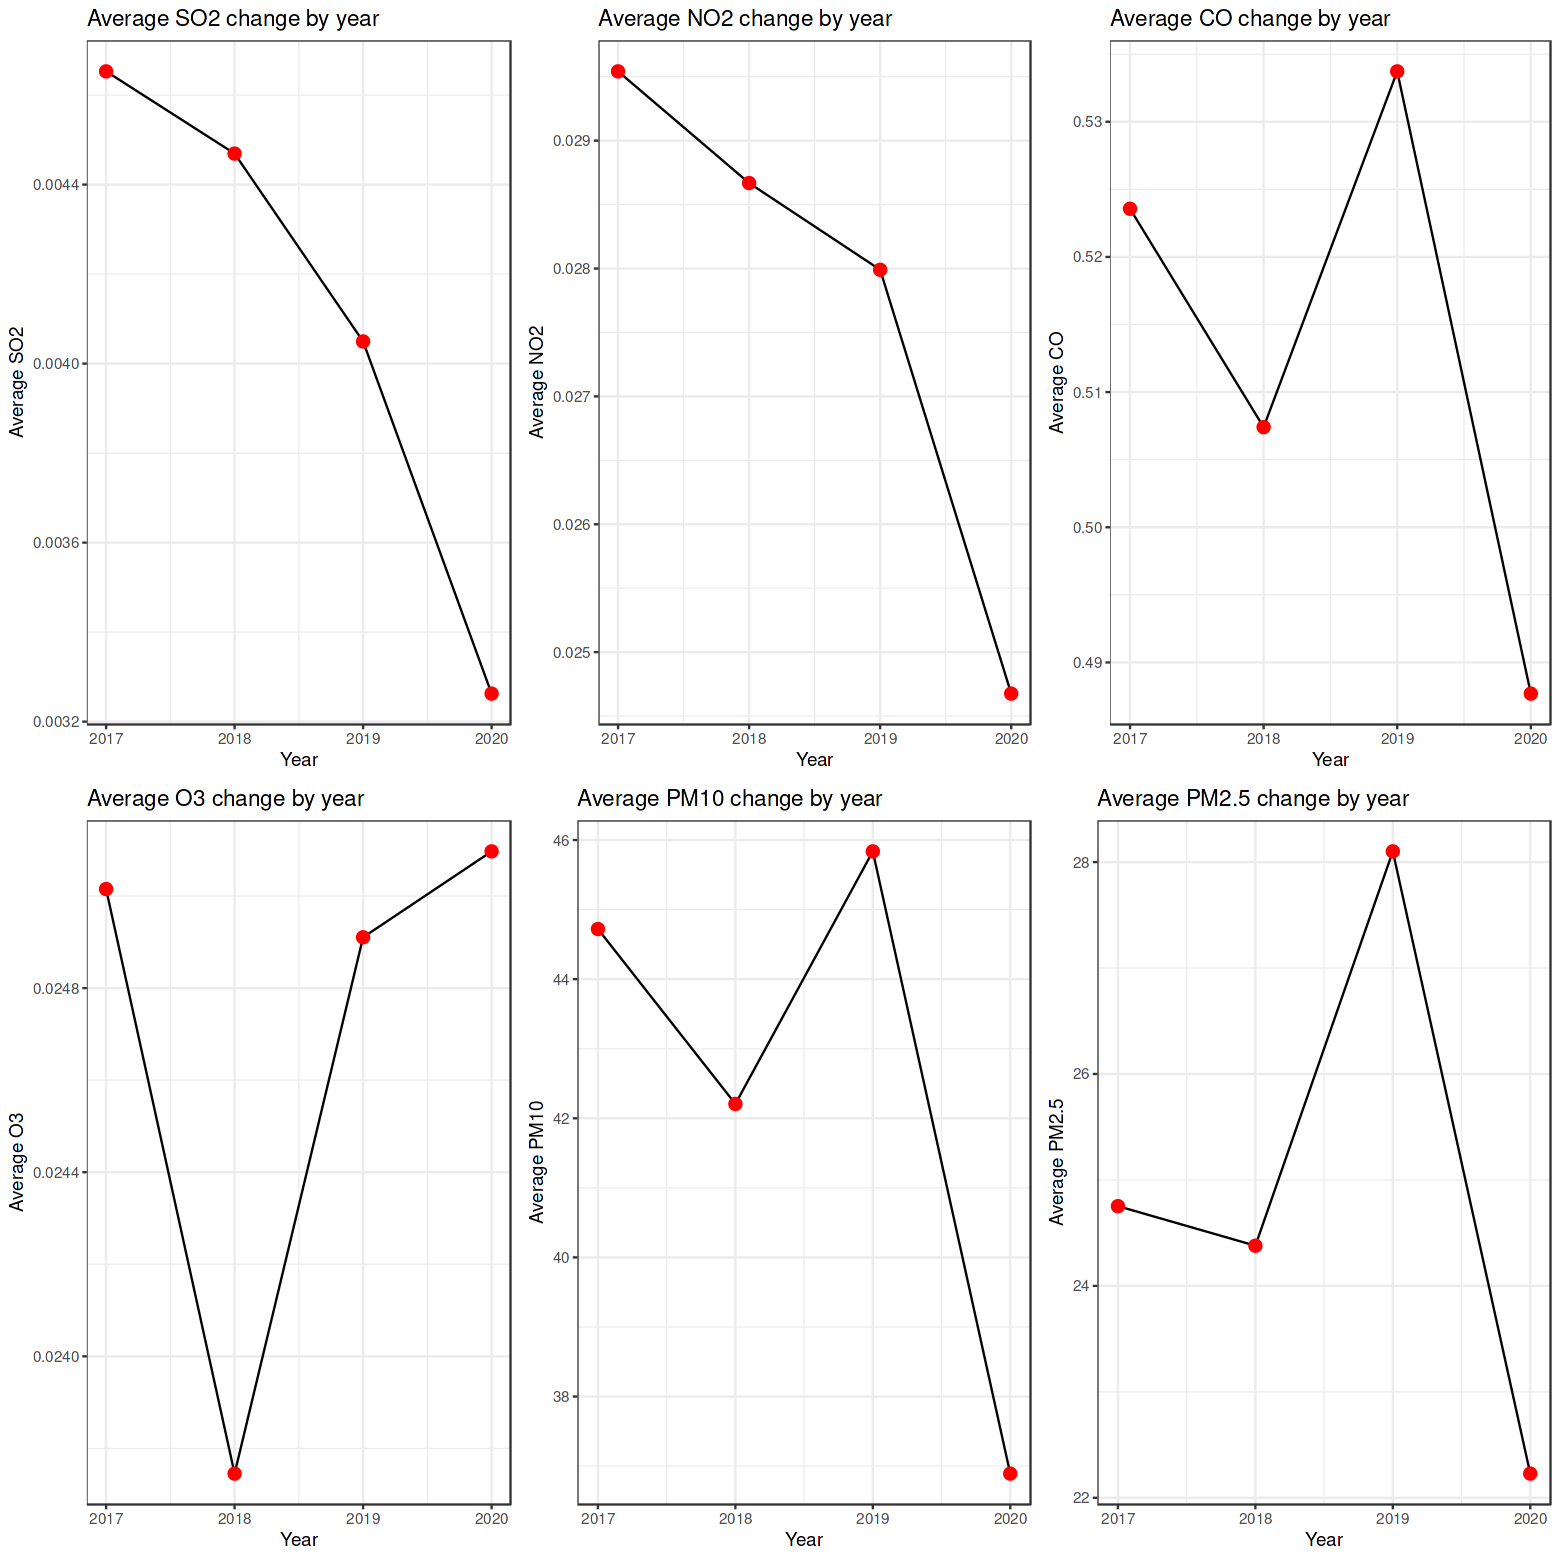

In [37]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

---------------

**Correlation**

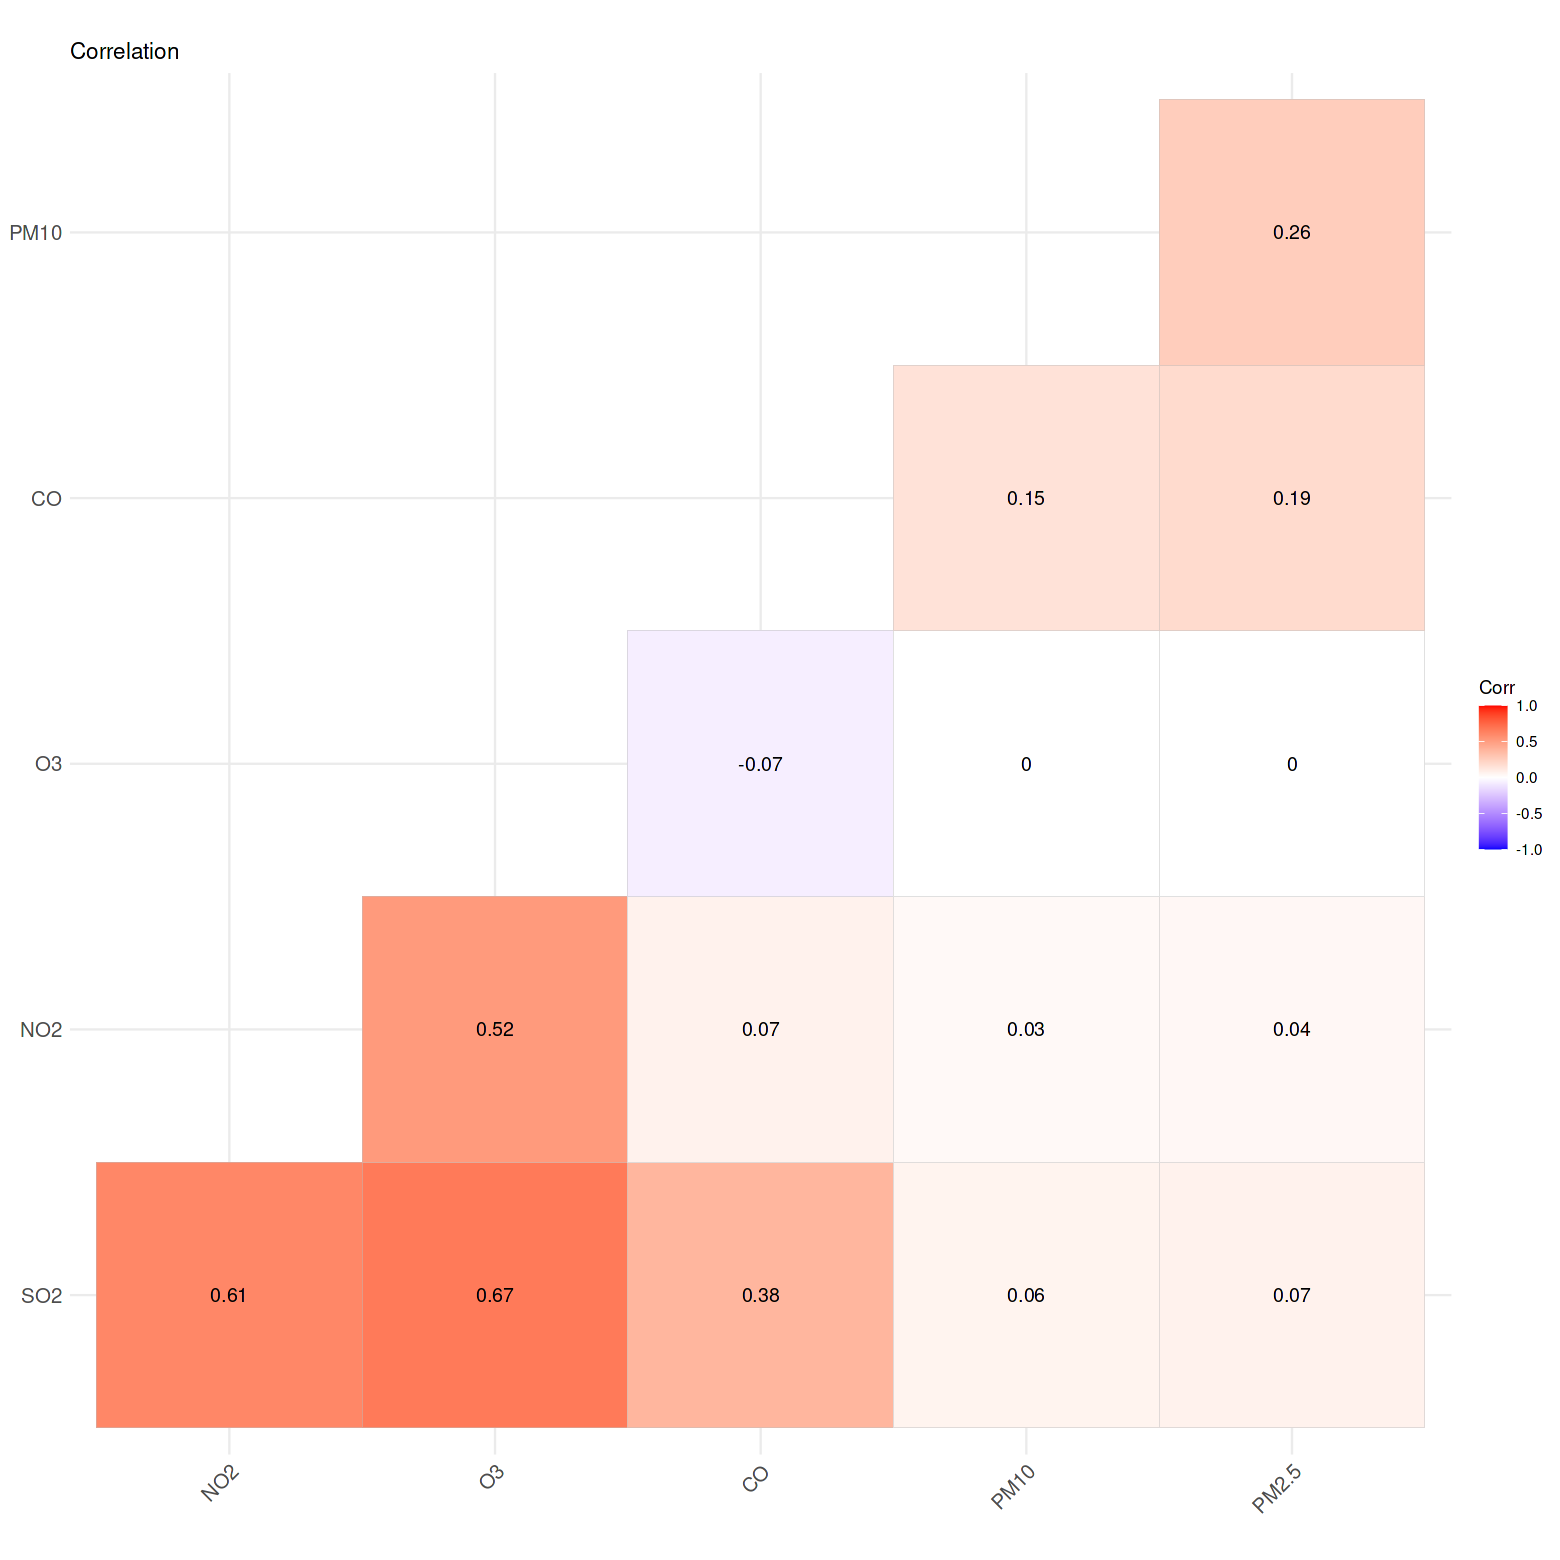

In [38]:
ggcorrplot(cor(data[,3:8]) , type = "lower", lab=T, title = 'Correlation')

-----------

**Please leave your advice in the comments. Thank you**